In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from tqdm.notebook import tqdm
load_dotenv()
from glob import glob

In [2]:
cred_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager = cred_manager)

In [3]:
years = [2009, 2012, 2015, 2018, 2021]
datasets = [pd.read_csv(f'data/artists_{year}.csv') for year in years]
matrices = []

In [4]:
# 2009
x = 0
yr = years[x]
data = datasets[x]
names, uris = (data['artist'], data['uri'])
n = data.shape[0]
artist_dict = {artist: i for i, artist in enumerate(names)}
adj_matrix = np.zeros((n, n))
zipped = zip(names, uris)
for i, artist in tqdm(enumerate(zipped)):
    name, uri = artist
    offset = 0
    albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
    query_length = len(albums)
    while query_length == 50:
        offset += 50
        new_albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
        albums += new_albums
        query_length = len(new_albums)
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < yr - 1 or year > yr + 1:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                feat_name = song_artist['name']
                if feat_name != name:
                    try:
                        index = artist_dict[feat_name]
                        adj_matrix[i, index] = 1
                    except:
                        pass
    #print(i)
matrices.append(adj_matrix)
df = pd.DataFrame(adj_matrix, columns = names, index = names)
df.to_csv(f'data/adj_matrix_{yr}.csv')

0it [00:00, ?it/s]

In [5]:
# 2012
x = 1
yr = years[x]
data = datasets[x]
names, uris = (data['artist'], data['uri'])
n = data.shape[0]
artist_dict = {artist: i for i, artist in enumerate(names)}
adj_matrix = np.zeros((n, n))
zipped = zip(names, uris)
for i, artist in tqdm(enumerate(zipped)):
    name, uri = artist
    offset = 0
    albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
    query_length = len(albums)
    while query_length == 50:
        offset += 50
        new_albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
        albums += new_albums
        query_length = len(new_albums)
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < yr - 1 or year > yr + 1:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                feat_name = song_artist['name']
                if feat_name != name:
                    try:
                        index = artist_dict[feat_name]
                        adj_matrix[i, index] = 1
                    except:
                        pass
    #print(i)
matrices.append(adj_matrix)
df = pd.DataFrame(adj_matrix, columns = names, index = names)
df.to_csv(f'data/adj_matrix_{yr}.csv')

0it [00:00, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [6]:
# 2015
x = 2
yr = years[x]
data = datasets[x]
names, uris = (data['artist'], data['uri'])
n = data.shape[0]
artist_dict = {artist: i for i, artist in enumerate(names)}
adj_matrix = np.zeros((n, n))
zipped = zip(names, uris)
for i, artist in tqdm(enumerate(zipped)):
    name, uri = artist
    offset = 0
    albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
    query_length = len(albums)
    while query_length == 50:
        offset += 50
        new_albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
        albums += new_albums
        query_length = len(new_albums)
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < yr - 1 or year > yr + 1:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                feat_name = song_artist['name']
                if feat_name != name:
                    try:
                        index = artist_dict[feat_name]
                        adj_matrix[i, index] = 1
                    except:
                        pass
    print(i)
matrices.append(adj_matrix)
df = pd.DataFrame(adj_matrix, columns = names, index = names)
df.to_csv(f'data/adj_matrix_{yr}.csv')

0it [00:00, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [7]:
# 2018
x = 3
yr = years[x]
data = datasets[x]
names, uris = (data['artist'], data['uri'])
n = data.shape[0]
artist_dict = {artist: i for i, artist in enumerate(names)}
adj_matrix = np.zeros((n, n))
zipped = zip(names, uris)
for i, artist in tqdm(enumerate(zipped)):
    name, uri = artist
    offset = 0
    albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
    query_length = len(albums)
    while query_length == 50:
        offset += 50
        new_albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
        albums += new_albums
        query_length = len(new_albums)
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < yr - 1 or year > yr + 1:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                feat_name = song_artist['name']
                if feat_name != name:
                    try:
                        index = artist_dict[feat_name]
                        adj_matrix[i, index] = 1
                    except:
                        pass
    print(i)
matrices.append(adj_matrix)
df = pd.DataFrame(adj_matrix, columns = names, index = names)
df.to_csv(f'data/adj_matrix_{yr}.csv')

0it [00:00, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
# 2021
x = 4
yr = years[x]
data = datasets[x]
names, uris = (data['artist'], data['uri'])
n = data.shape[0]
artist_dict = {artist: i for i, artist in enumerate(names)}
adj_matrix = np.zeros((n, n))
zipped = zip(names, uris)
for i, artist in tqdm(enumerate(zipped)):
    name, uri = artist
    offset = 0
    albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
    query_length = len(albums)
    while query_length == 50:
        offset += 50
        new_albums = sp.artist_albums(uri, album_type = 'album', limit = 50, offset = offset)['items']
        albums += new_albums
        query_length = len(new_albums)
    dates = [album['release_date'] for album in albums]
    for j, date in reversed(list(enumerate(dates))):
        year = int(date[0:4])
        if year < yr - 1 or year > yr + 1:
            del albums[j]
    albums = [album['uri'] for album in albums]
    for album in albums:
        tracks = sp.album_tracks(album)['items']
        song_artists = [track['artists'] for track in tracks]
        for song_artist_list in song_artists:
            for song_artist in song_artist_list:
                feat_name = song_artist['name']
                if feat_name != name:
                    try:
                        index = artist_dict[feat_name]
                        adj_matrix[i, index] = 1
                    except:
                        pass
    print(i)
matrices.append(adj_matrix)
df = pd.DataFrame(adj_matrix, columns = names, index = names)
df.to_csv(f'data/adj_matrix_{yr}.csv')

0it [00:00, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [17]:
Gs = [nx.Graph(m) for m in matrices]

In [18]:
for G in Gs:
    print(nx.number_connected_components(G))

47
37
36
17
33


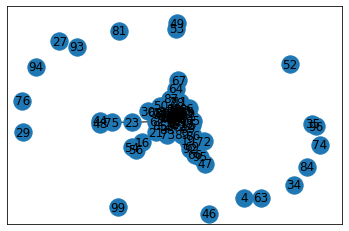

In [20]:
nx.draw_networkx(nx.Graph(matrices[-2]))

In [12]:
adj_matrix = np.array([[0, 1], [0, 0]])
G = nx.DiGraph(adj_matrix)

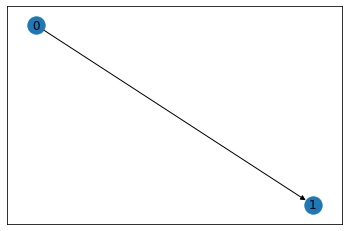

In [13]:
nx.draw_networkx(G)

In [14]:
H = nx.Graph(adj_matrix)

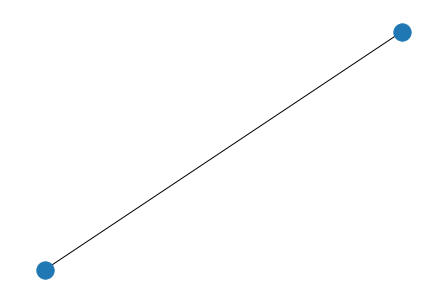

In [15]:
nx.draw(H)

In [16]:
H.adj

AdjacencyView({0: {1: {'weight': 1}}, 1: {0: {'weight': 1}}})